In [102]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,  recall_score, f1_score, classification_report, roc_curve,  auc, precision_recall_curve,  average_precision_score

In [103]:
df = pd.read_csv('submission.csv')


In [104]:
df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,101,40-64,male,20-29y,none,working class,0.641637,1,before 2015,1,1,10238,13000,10,0,0,1,Sports Car
1,101,65+,male,0-9y,university,upper class,0.548347,1,after 2015,0,1,31223,9000,0,0,1,1,Sedan
2,101,16-25,female,0-9y,university,upper class,0.767802,1,before 2015,1,1,10238,16000,0,0,1,0,SUV
3,101,40-64,male,20-29y,high school,working class,0.486620,1,before 2015,1,1,10238,9000,0,0,1,0,Sedan
4,101,40-64,female,20-29y,high school,working class,0.818329,1,before 2015,0,1,33718,13000,0,0,0,1,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,999974,16-25,male,10-19y,high school,working class,0.580739,1,after 2015,1,1,10238,9000,0,0,0,0,Sports Car
104996,999975,40-64,female,20-29y,high school,poverty,0.773236,1,before 2015,0,1,10238,14000,1,0,0,1,Sedan
104997,999975,16-25,female,10-19y,university,poverty,0.459725,1,before 2015,1,0,10238,15000,0,0,9,0,Sports Car
104998,999976,40-64,male,0-9y,none,upper class,0.488213,0,after 2015,1,0,30572,13000,0,0,0,0,Sports Car


In [105]:
df['OUTCOME'].unique()

array([1, 0], dtype=int64)

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
df['AGE'].unique()

array(['40-64', '65+', '16-25', '26-39'], dtype=object)

In [108]:
df['AGE']=df['AGE'].map({'16-25':0,'26-39':1, '40-64':2, '65+':3})

In [109]:
df['GENDER'].unique()

array(['male', 'female'], dtype=object)

In [110]:
df['GENDER']=df['GENDER'].map({'male':0,'female':1})

In [111]:
df['DRIVING_EXPERIENCE'].unique()

array(['20-29y', '0-9y', '10-19y', '30y+'], dtype=object)

In [112]:
df['DRIVING_EXPERIENCE']=df['DRIVING_EXPERIENCE'].map({'0-9y':0,'10-19y':1, '20-29y':2, '30y+':3})

In [113]:
df['EDUCATION'].unique()

array(['none', 'university', 'high school'], dtype=object)

In [114]:
df['EDUCATION']=df['EDUCATION'].map({'none':0,'university':1,'high school':2})

In [115]:
df['INCOME'].unique()

array(['working class', 'upper class', 'middle class', 'poverty'],
      dtype=object)

In [116]:
df['INCOME']=df['INCOME'].map({'poverty':0,'middle class':1,'upper class':2,'working class':3})

In [117]:
df['VEHICLE_YEAR'].unique()

array(['before 2015', 'after 2015'], dtype=object)

In [118]:
df['VEHICLE_YEAR']=df['VEHICLE_YEAR'].map({'before 2015':0,'after 2015':1})

In [119]:
df['TYPE_OF_VEHICLE'].unique()

array(['Sports Car', 'Sedan', 'SUV', 'HatchBack'], dtype=object)

In [120]:
df['TYPE_OF_VEHICLE']=df['TYPE_OF_VEHICLE'].map({'Sports Car':0,'Sedan':1,'SUV':2,'HatchBack':3})

In [121]:
df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,101,2,0,2,0,3,0.641637,1,0,1,1,10238,13000,10,0,0,1,0
1,101,3,0,0,1,2,0.548347,1,1,0,1,31223,9000,0,0,1,1,1
2,101,0,1,0,1,2,0.767802,1,0,1,1,10238,16000,0,0,1,0,2
3,101,2,0,2,2,3,0.486620,1,0,1,1,10238,9000,0,0,1,0,1
4,101,2,1,2,2,3,0.818329,1,0,0,1,33718,13000,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,999974,0,0,1,2,3,0.580739,1,1,1,1,10238,9000,0,0,0,0,0
104996,999975,2,1,2,2,0,0.773236,1,0,0,1,10238,14000,1,0,0,1,1
104997,999975,0,1,1,1,0,0.459725,1,0,1,0,10238,15000,0,0,9,0,0
104998,999976,2,0,0,0,2,0.488213,0,1,1,0,30572,13000,0,0,0,0,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  int64  
 2   GENDER               105000 non-null  int64  
 3   DRIVING_EXPERIENCE   105000 non-null  int64  
 4   EDUCATION            105000 non-null  int64  
 5   INCOME               105000 non-null  int64  
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  int64  
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [123]:
df = df.drop('ID',axis = 1)

In [124]:
df.isnull().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [125]:
df_clm = df.columns

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

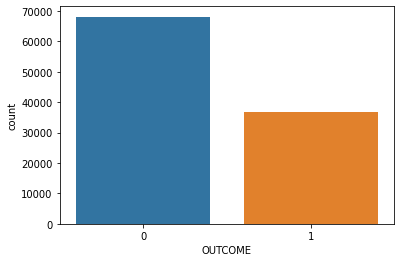

In [126]:
sns.countplot(df.OUTCOME)

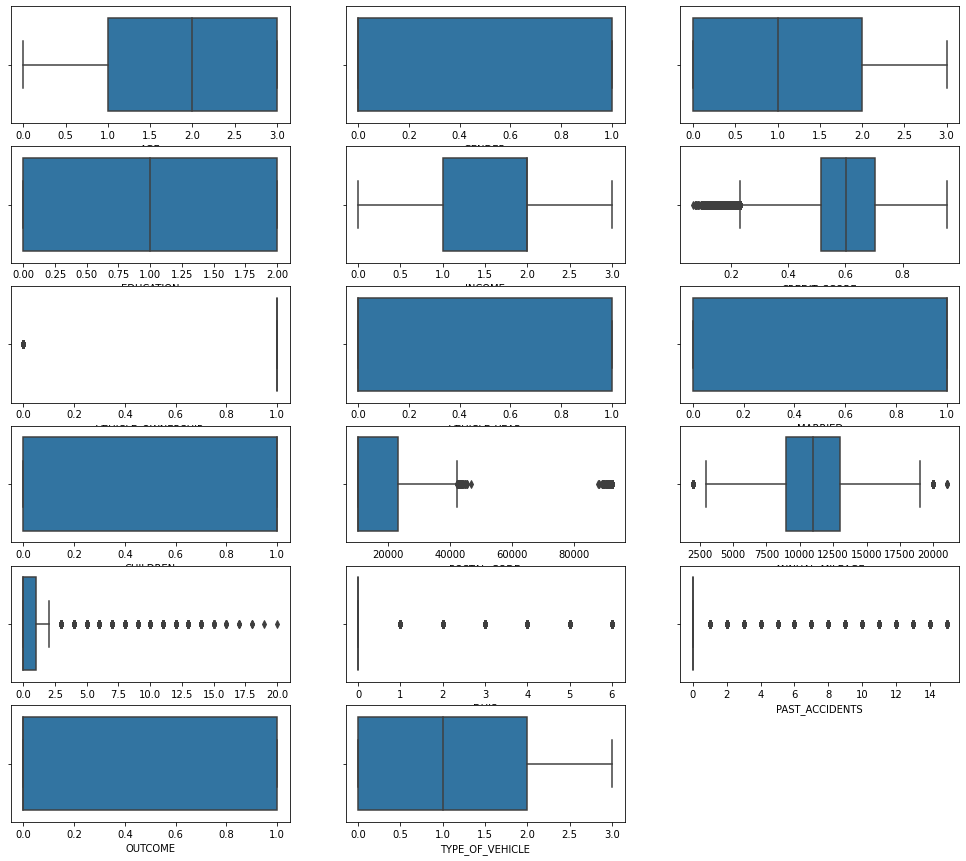

In [127]:
t=1
plt.figure(figsize = (17,15))
for i in df_clm:
    plt.subplot(6,3,t)
    sns.boxplot(df[i])
    t+=1
plt.show()    

In [128]:
df_clm

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [129]:
df_c = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE']

In [130]:
for i in df_c:
    q1,q3 = np.quantile(df[i],[0.25,0.75])
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    df[i] = np.where(df[i] > ub, ub, df[i])
    df[i] = np.where(df[i] < lb, lb, df[i])

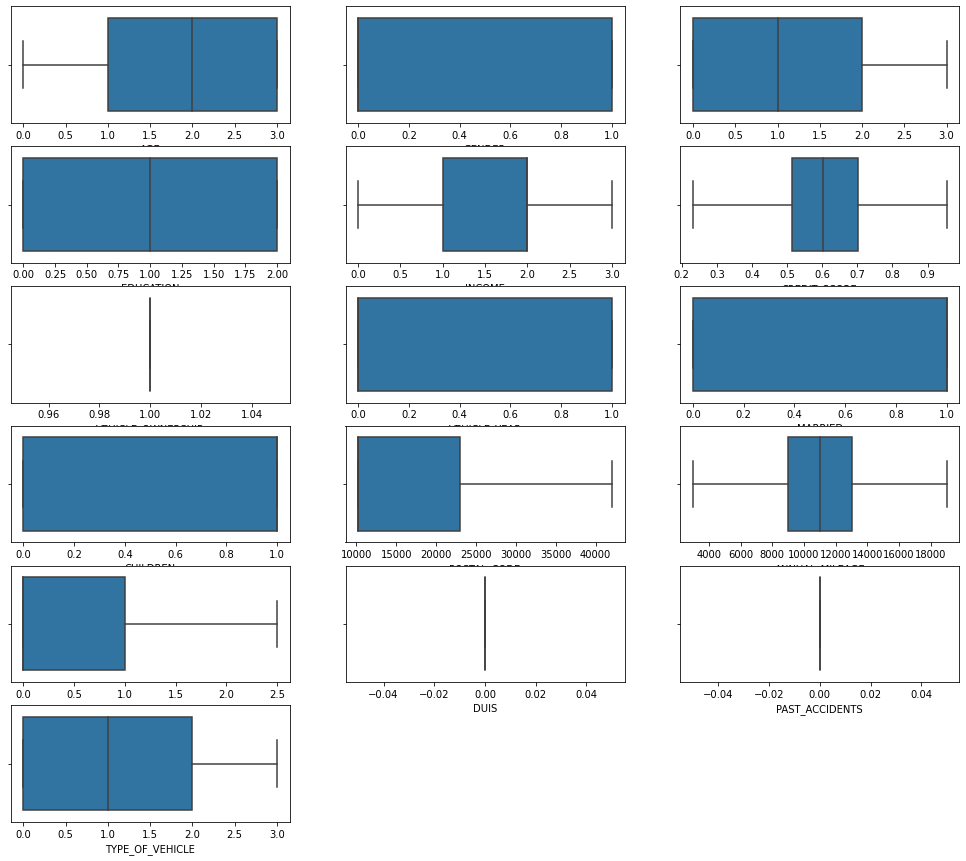

In [131]:
t=1
plt.figure(figsize = (17,15))
for i in df_c:
    plt.subplot(6,3,t)
    sns.boxplot(df[i])
    t+=1
plt.show()

In [132]:
df.skew()

AGE                   -0.389983
GENDER                 0.503509
DRIVING_EXPERIENCE     0.100319
EDUCATION             -0.351444
INCOME                -0.610045
CREDIT_SCORE          -0.178050
VEHICLE_OWNERSHIP      0.000000
VEHICLE_YEAR           0.191774
MARRIED               -0.341446
CHILDREN              -0.080065
POSTAL_CODE            1.257846
ANNUAL_MILEAGE        -0.485957
SPEEDING_VIOLATIONS    1.295590
DUIS                   0.000000
PAST_ACCIDENTS         0.000000
OUTCOME                0.621619
TYPE_OF_VEHICLE        0.286919
dtype: float64

<AxesSubplot:>

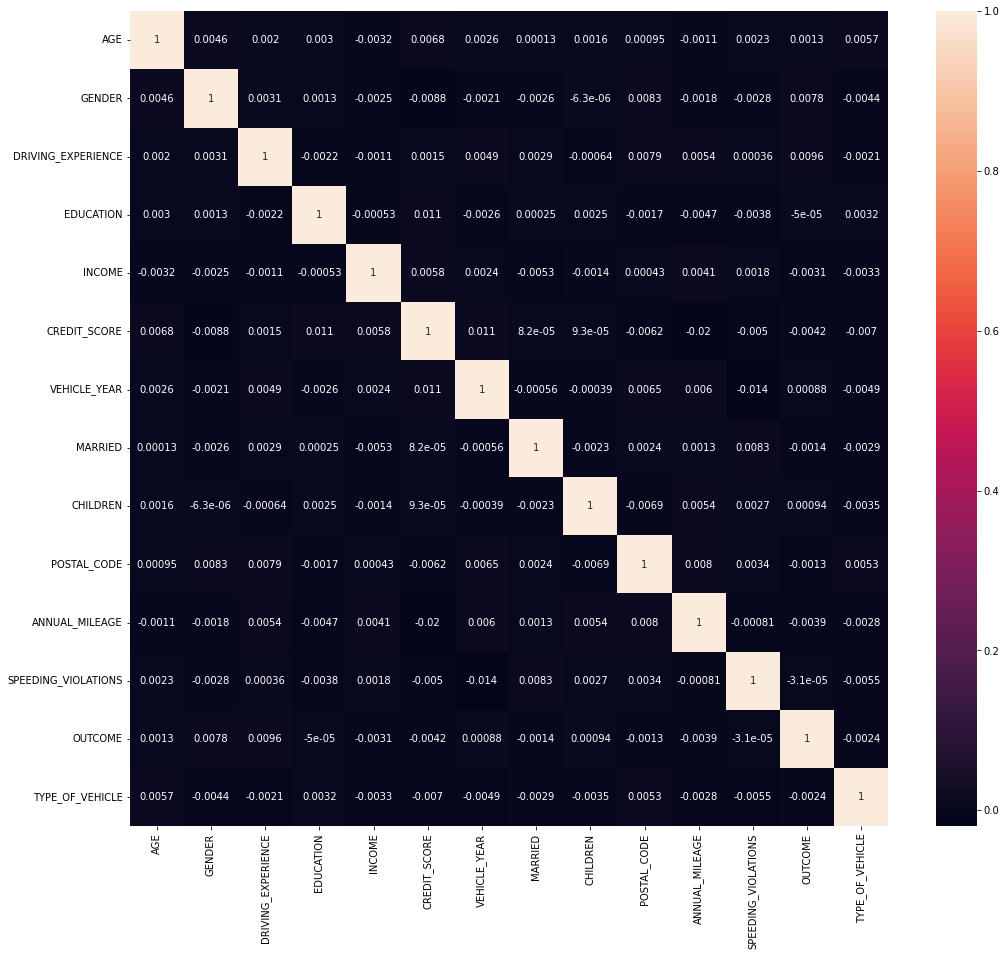

In [137]:
plt.figure(figsize = (17,15))
sns.heatmap(df.corr(), annot = True)

In [134]:
df = df.drop(['DUIS','PAST_ACCIDENTS','VEHICLE_OWNERSHIP'],axis = 1)

In [135]:
X = df.drop(['OUTCOME'],axis=1)
y = df.OUTCOME

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [138]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

In [139]:
def get_train_report(model, train_data):
    train_pred = model.predict(train_data)
    return(classification_report(y_train, train_pred))

In [140]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [141]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

### Base Model

In [142]:
Base_model=LogisticRegression()
Base_model.fit(X_train,y_train)

LogisticRegression()

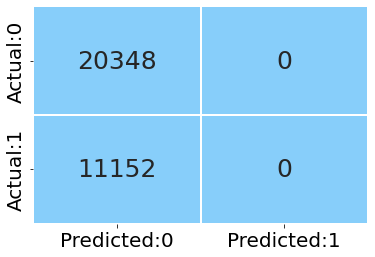

In [143]:
plot_confusion_matrix(Base_model, test_data = X_test)

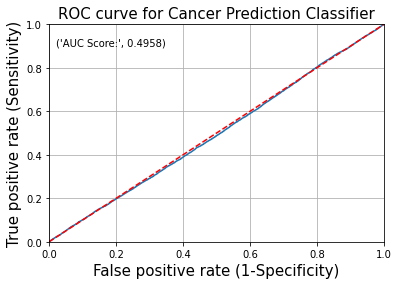

In [144]:
plot_roc(Base_model, test_data = X_test)

In [145]:
test_report = get_test_report(Base_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.00      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.32      0.50      0.39     31500
weighted avg       0.42      0.65      0.51     31500



In [146]:
print('Classification Report for train set: \n', get_train_report(Base_model, train_data = X_train))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     47734
           1       0.00      0.00      0.00     25766

    accuracy                           0.65     73500
   macro avg       0.32      0.50      0.39     73500
weighted avg       0.42      0.65      0.51     73500



In [147]:
print('Classification Report for test set: \n', get_test_report(Base_model, test_data = X_test))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.00      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.32      0.50      0.39     31500
weighted avg       0.42      0.65      0.51     31500



In [148]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

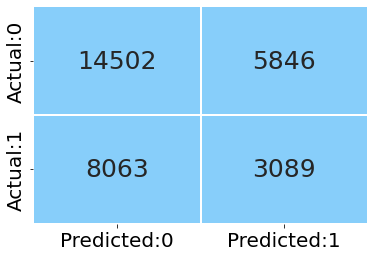

In [149]:
plot_confusion_matrix(knn_model, test_data = X_test)

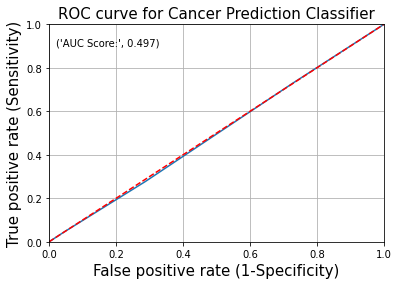

In [150]:
plot_roc(knn_model, test_data = X_test)

### KNN Classification GridSearchCV 

In [151]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

KeyboardInterrupt: 

In [505]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric= 'manhattan')
knn_model_hp = knn_classification.fit(X_train, y_train)

In [506]:
train_report = get_train_report(knn_model_hp, train_data = X_train)
print(train_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [507]:
test_report = get_test_report(knn_model_hp, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75       126
         1.0       0.41      0.49      0.44        49

    accuracy                           0.66       175
   macro avg       0.60      0.61      0.60       175
weighted avg       0.68      0.66      0.67       175



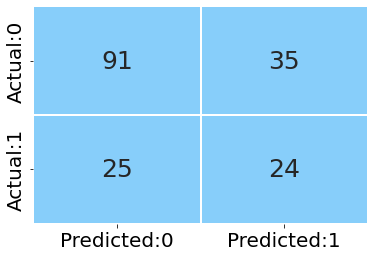

In [508]:
plot_confusion_matrix(knn_model_hp, test_data = X_test)

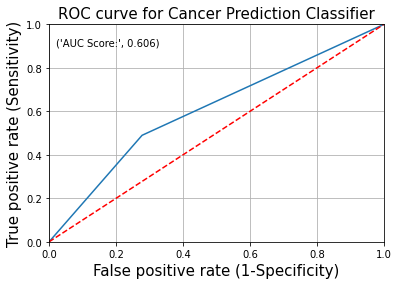

In [509]:
plot_roc(knn_model_hp, test_data = X_test)

### GaussianNB 

In [152]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

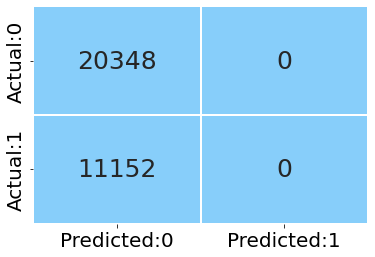

In [153]:
plot_confusion_matrix(gnb_model, test_data=X_test)

In [154]:
train_report = get_train_report(gnb_model, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     47734
           1       0.00      0.00      0.00     25766

    accuracy                           0.65     73500
   macro avg       0.32      0.50      0.39     73500
weighted avg       0.42      0.65      0.51     73500



In [155]:
test_report = get_test_report(gnb_model, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.00      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.32      0.50      0.39     31500
weighted avg       0.42      0.65      0.51     31500



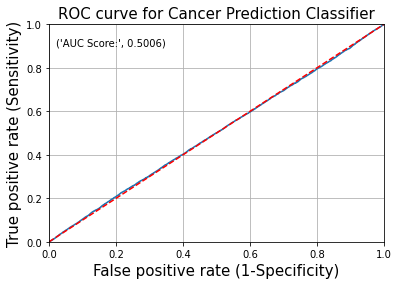

In [156]:
plot_roc(gnb_model, test_data=X_test)

In [157]:
y_pred_prob_knn = knn_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)
plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)
y_pred_prob_gnb = gnb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)
plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')
plt.grid(True)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Decision Tree Classification

In [158]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [159]:
train_report = get_train_report(decision_tree, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47734
           1       1.00      1.00      1.00     25766

    accuracy                           1.00     73500
   macro avg       1.00      1.00      1.00     73500
weighted avg       1.00      1.00      1.00     73500



In [160]:
test_report = get_test_report(decision_tree, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.64     20348
           1       0.36      0.36      0.36     11152

    accuracy                           0.54     31500
   macro avg       0.50      0.50      0.50     31500
weighted avg       0.54      0.54      0.54     31500



Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

if we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

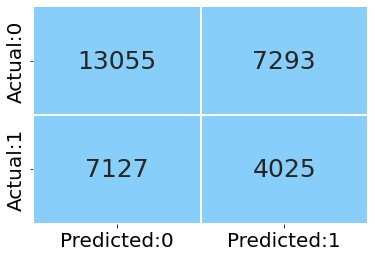

In [161]:
plot_confusion_matrix(decision_tree, test_data = X_test)

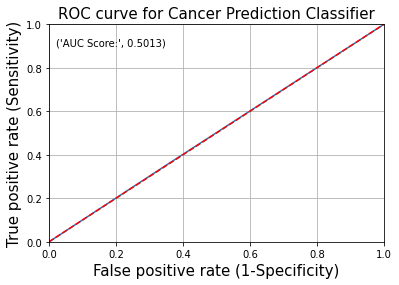

In [162]:
plot_roc(decision_tree, test_data=X_test)

In [163]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = dt_model.fit(X_train, y_train)
train_report = get_train_report(decision_tree, train_data=X_train)
print('Train data:\n', train_report)
test_report = get_test_report(decision_tree, test_data=X_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     47734
           1       0.51      0.00      0.01     25766

    accuracy                           0.65     73500
   macro avg       0.58      0.50      0.40     73500
weighted avg       0.60      0.65      0.51     73500

Test data:
               precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.36      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.50      0.50      0.39     31500
weighted avg       0.55      0.65      0.51     31500



Interpretation: From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Decision Tree Classification GridSearchCV

In [522]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(2, 10),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(2,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1, 10)}]
# decision_tree_classification = DecisionTreeClassifier(random_state = 10)
# tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)
# tree_grid_model = tree_grid.fit(X_train, y_train)
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [523]:
# dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
#                                   max_depth = tree_grid_model.best_params_.get('max_depth'),
#                                   max_features = tree_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)

# # use fit() to fit the model on the train set
# dt_model = dt_model.fit(X_train, y_train)

In [524]:
# print('Classification Report for train set: \n', get_train_report(dt_model, train_data = X_train))

In [525]:
# print('Classification Report for test set: \n', get_test_report(dt_model, test_data = X_test))

**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

### Random Forest classification

In [164]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [167]:
train_report = get_train_report(rf_model,train_data = X_train)
print(train_report) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     47734
           1       1.00      0.93      0.96     25766

    accuracy                           0.97     73500
   macro avg       0.98      0.96      0.97     73500
weighted avg       0.98      0.97      0.97     73500



In [166]:
test_report = get_test_report(rf_model, test_data = X_test)
print(test_report) 

              precision    recall  f1-score   support

           0       0.65      0.86      0.74     20348
           1       0.36      0.14      0.21     11152

    accuracy                           0.61     31500
   macro avg       0.50      0.50      0.47     31500
weighted avg       0.54      0.61      0.55     31500



### Random Forest Classification Grid Search CV

In [529]:
# tuned_paramaters_rf = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [10, 30, 50, 70, 90],
#                      'max_depth': [10, 15, 20],
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': [2, 5, 8, 11],
#                      'min_samples_leaf': [1, 5, 9],
#                      'max_leaf_nodes': [2, 5, 8, 11]}]
 
# # instantiate the 'RandomForestClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# random_forest_classification = RandomForestClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the random forest classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# rf_grid = GridSearchCV(estimator = random_forest_classification, 
#                        param_grid = tuned_paramaters_rf, 
#                        cv = 5)

# # use fit() to fit the model on the train set
# rf_grid_model = rf_grid.fit(X_train, y_train)

# # get the best parameters
# print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [530]:
# rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
#                                   n_estimators = rf_grid_model.best_params_.get('n_estimators'),
#                                   max_depth = rf_grid_model.best_params_.get('max_depth'),
#                                   max_features = rf_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)
# rf_model = rf_model.fit(X_train, y_train)
# print('Classification Report for test set:\n', get_test_report(rf_model,test_data = X_test))

In [531]:
# print('Classification Report for Train set:\n', get_train_report(rf_model,train_data = X_train))

In [532]:
# plot_roc(rf_model,test_data=X_test)

In [533]:
# plot_confusion_matrix(rf_model, test_data=X_test)

Interpretation: The accuracy of the test dataset increased from 0.81 to 0.82 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

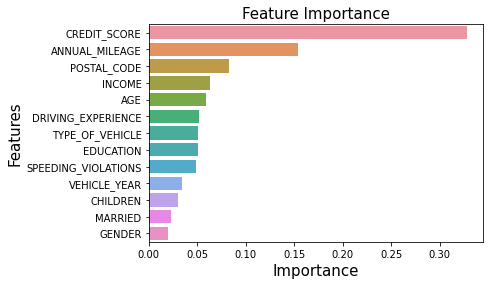

In [168]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Ada Boost 

In [169]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [536]:
test_report = get_train_report(ada_model,train_data = X_train)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       290
         1.0       0.72      0.60      0.65       118

    accuracy                           0.82       408
   macro avg       0.78      0.75      0.76       408
weighted avg       0.81      0.82      0.81       408



In [170]:
test_report = get_test_report(ada_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.29      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.47      0.50      0.39     31500
weighted avg       0.52      0.65      0.51     31500



Interpretation: The output shows that the model is 83% accurate.

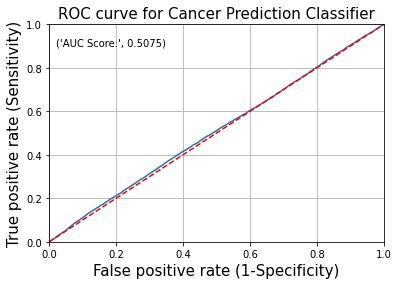

In [171]:
plot_roc(ada_model,test_data=X_test)

### Gradient Boosting Classification

In [172]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [173]:
test_report = get_train_report(gboost_model,train_data = X_train)
print(test_report)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     47734
           1       1.00      0.28      0.44     25766

    accuracy                           0.75     73500
   macro avg       0.86      0.64      0.64     73500
weighted avg       0.82      0.75      0.70     73500



In [174]:
test_report = get_test_report(gboost_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.96      0.77     20348
           1       0.36      0.04      0.08     11152

    accuracy                           0.63     31500
   macro avg       0.50      0.50      0.42     31500
weighted avg       0.54      0.63      0.53     31500



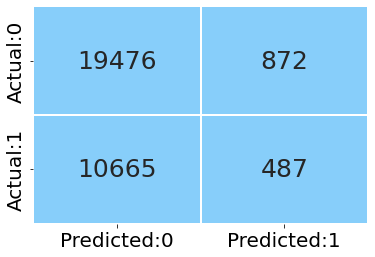

In [175]:
plot_confusion_matrix(gboost_model, test_data=X_test)

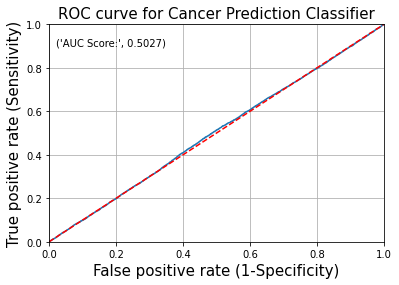

In [176]:
plot_roc(gboost_model,test_data = X_test)

### XGB Classification

In [177]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
test_report = get_train_report(xgb_model,train_data = X_train)
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     47734
           1       0.96      0.31      0.46     25766

    accuracy                           0.75     73500
   macro avg       0.84      0.65      0.65     73500
weighted avg       0.81      0.75      0.71     73500



In [179]:
test_report = get_test_report(xgb_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.93      0.76     20348
           1       0.36      0.08      0.13     11152

    accuracy                           0.63     31500
   macro avg       0.51      0.50      0.44     31500
weighted avg       0.55      0.63      0.54     31500



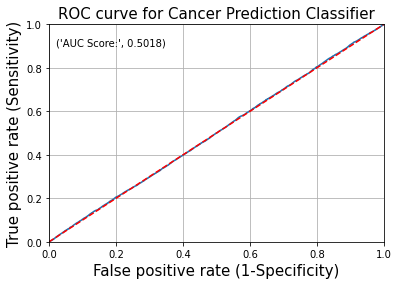

In [180]:
plot_roc(xgb_model,test_data = X_test)

### XGB Classification Grid Search CV

In [181]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')


KeyboardInterrupt



In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model,test_data = X_test))

In [ ]:
print('Classification Report for Train set:\n', get_train_report(xgb_model,train_data = X_train))

In [ ]:
plot_confusion_matrix(xgb_grid_model, test_data=X_test)

In [ ]:
plot_roc(xgb_model,test_data = X_test)

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [ ]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label='RandomForest Model (AUC Score = %0.4f)' % auc_score_rf)
y_pred_prob_xgb = xgb_grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
plt.plot(fpr, tpr, label='XGB Model (AUC Score = %0.4f)' % auc_score_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('RandomForest Model Vs. XGB Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')
plt.grid(True)

### Stacking Classification 

In [182]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(),)

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [183]:
test_report = get_train_report(stack_model,train_data = X_train)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     47734
           1       0.00      0.00      0.00     25766

    accuracy                           0.65     73500
   macro avg       0.32      0.50      0.39     73500
weighted avg       0.42      0.65      0.51     73500



In [184]:
test_report = get_test_report(stack_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.78     20348
           1       0.00      0.00      0.00     11152

    accuracy                           0.65     31500
   macro avg       0.32      0.50      0.39     31500
weighted avg       0.42      0.65      0.51     31500



In [185]:
crossvalst = cross_val_score(stack_model, X_train, y_train, cv=5) 
mean_accuracy = crossvalst.mean()
mean_accuracy

0.6492108843537415

In [186]:
crossvalst = cross_val_score(stack_model, X_test, y_test, cv=5) 
mean_accuracy = crossvalst.mean()
mean_accuracy

0.6458095238095238

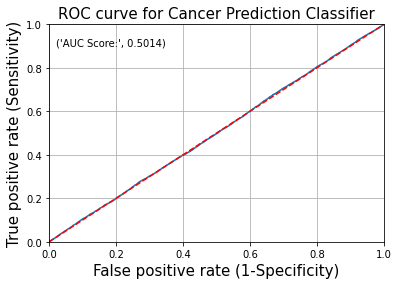

In [187]:
plot_roc(stack_model,test_data = X_test)

In [ ]:
model = LogisticRegression()
crossval = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

In [ ]:
mean_accuracy_train = crossval.mean()
mean_accuracy_train

In [ ]:
model = LogisticRegression()
crossvalt = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation

In [ ]:
mean_accuracy = crossvalt.mean()
mean_accuracy

In [ ]:
model = LogisticRegression(penalty='l2')  # L2 regularization
model.fit(X_train, y_train)

In [ ]:
test_report = get_train_report(model,train_data = X_train)
print(test_report)

In [ ]:
test_report = get_test_report(model,test_data = X_test)
print(test_report)